# Creating a Product based Recommender System with the help of Correlation.

In [1]:
import pandas as pd
import numpy as np

In [2]:
combined=pd.read_csv("Combined.csv")

In [3]:
combined.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,customer_id,review_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_category_name_english
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,97ca439bc427b48bc1cd7177abe71365,5,Super recomended,2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,volta redonda,SP,cool_stuff
1,1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,b11cba360bbe71410c291b764753d37f,5,Super recomended,2017-07-14 00:00:00,2017-07-17 12:50:07,0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,volta redonda,SP,cool_stuff
2,2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff,4ef55bf80f711b372afebcb7c715344a,af01c4017c5ab46df6cc810e069e654a,4,Recomended,2018-06-05 00:00:00,2018-06-06 21:41:12,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,volta redonda,SP,cool_stuff
3,3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,8304ff37d8b16b57086fa283fe0c44f8,5,Super recomended,2017-08-10 00:00:00,2017-08-13 03:35:17,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,volta redonda,SP,cool_stuff
4,4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,426f43a82185969503fb3c86241a9535,5,Super recomended,2017-08-25 00:00:00,2017-08-28 00:51:18,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,volta redonda,SP,cool_stuff


In [4]:
combined.shape

(108072, 20)

In [5]:
df1=pd.read_csv("combined.csv",usecols=['product_id','customer_unique_id','product_category_name_english','review_score'])

In [6]:
df1

,product_id,review_score,customer_unique_id,product_category_name_english
0,4244733e06e7ecb4970a6e2683c13e61,5,871766c5855e863f6eccc05f988b23cb,cool_stuff
1,4244733e06e7ecb4970a6e2683c13e61,5,0fb8e3eab2d3e79d92bb3fffbb97f188,cool_stuff
2,4244733e06e7ecb4970a6e2683c13e61,4,3419052c8c6b45daf79c1e426f9e9bcb,cool_stuff
3,4244733e06e7ecb4970a6e2683c13e61,5,e7c828d22c0682c1565252deefbe334d,cool_stuff
4,4244733e06e7ecb4970a6e2683c13e61,5,0bb98ba72dcc08e95f9d8cc434e9a2cc,cool_stuff
...,...,...,...,...
108067,5fd35bd0069ce2a404716901326b1336,1,02604e6d24c19c9e8c72bb1044bc48e0,flowers
108068,4a3ffd5293869f4b85d163eb3b4d0faa,5,5317c09d1475f22e0e3bcfa4fb04f32b,flowers
108069,c56d677c973431acb4abfedbd33d488c,4,bb831a318d6470c49b1c8d8d67b6f92a,flowers
108070,1561355720506eaee90adde6aa1375a9,4,914b5fd6781d4dfd59641119b6d0e1de,flowers


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
df1.groupby('product_category_name_english')['review_score'].mean().sort_values(ascending=False).head()

product_category_name_english
cds_dvds_musicals            4.642857
fashion_childrens_clothes    4.428571
books_general_interest       4.423290
books_imported               4.406780
costruction_tools_tools      4.346535
Name: review_score, dtype: float64

In [9]:
df1.groupby('product_category_name_english')['review_score'].count().sort_values(ascending=False).head()

product_category_name_english
bed_bath_table           10647
health_beauty             9396
sports_leisure            8229
furniture_decor           7881
computers_accessories     7520
Name: review_score, dtype: int64

In [10]:
reviews = pd.DataFrame(df1.groupby('product_category_name_english')['review_score'].mean())
reviews.head()

,review_score
product_category_name_english,
agro_industry_and_commerce,4.116183
air_conditioning,3.931900
art,3.933014
arts_and_craftmanship,3.894737
audio,3.834254


In [11]:
reviews['num of reviews'] = pd.DataFrame(df1.groupby('product_category_name_english')['review_score'].count())
reviews.head()

,review_score,num of reviews
product_category_name_english,,
agro_industry_and_commerce,4.116183,241
air_conditioning,3.931900,279
art,3.933014,209
arts_and_craftmanship,3.894737,19
audio,3.834254,362


Let's explore the data a bit and get a look at some of the best review product.

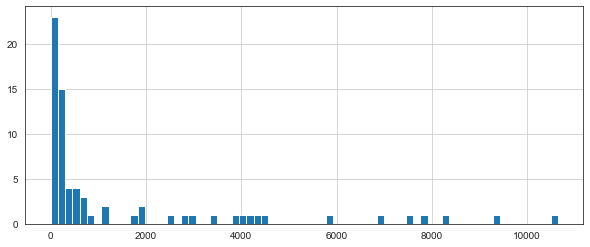

In [12]:
plt.figure(figsize=(10,4))
reviews['num of reviews'].hist(bins=70)

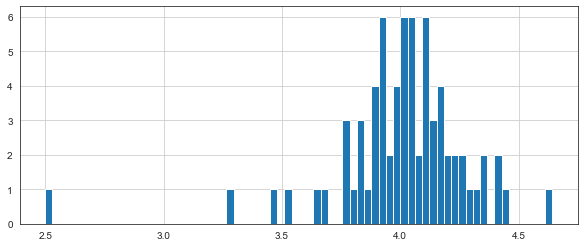

In [13]:
plt.figure(figsize=(10,4))
reviews['review_score'].hist(bins=70)

Now that we have a general idea of what the data looks like,

# Recommending Similar Product

Create a matrix that has the customer unique id on one access and the product_category_name english on another axis. Each cell will then consist of the review the customer gave to that product there will be a lot of NaN values, because most people have not review most of the product

In [14]:
df2 = df1.pivot_table(index='customer_unique_id',columns='product_category_name_english',values='review_score')
df2.head()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000f46a3911fa3c0805444483337064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
0000f6ccb0745a6a4b88665a16c9f078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
0004aac84e0df4da2b147fca70cf8255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN


Most reviewed product:

In [15]:
reviews.sort_values('num of reviews',ascending=False).head(10)

,review_score,num of reviews
product_category_name_english,,
bed_bath_table,3.863342,10647
health_beauty,4.113878,9396
sports_leisure,4.080447,8229
furniture_decor,3.897221,7881
computers_accessories,3.929388,7520
housewares,4.035200,6875
watches_gifts,3.996422,5870
telephony,3.925480,4482
garden_tools,4.010054,4277


In [16]:
bedbath_user_reviews = df2['bed_bath_table']
telephony_user_reviews = df2['telephony']
bedbath_user_reviews.head()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    5.0
0000b849f77a49e4a4ce2b2a4ca5be3f    NaN
0000f46a3911fa3c0805444483337064    NaN
0000f6ccb0745a6a4b88665a16c9f078    NaN
0004aac84e0df4da2b147fca70cf8255    NaN
Name: bed_bath_table, dtype: float64

## We can then use corrwith() method to get correlations between two pandas series:

In [17]:
similar_to_bedbath = df2.corrwith(bedbath_user_reviews)
similar_to_telephony = df2.corrwith(telephony_user_reviews)

F:\anaconda\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
F:\anaconda\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


clean this by removing NaN values and using a DataFrame instead of a series

In [18]:
corr_bedbath = pd.DataFrame(similar_to_bedbath,columns=['Correlation'])
corr_bedbath.dropna(inplace=True)
corr_bedbath.head()

,Correlation
product_category_name_english,
baby,1.0
bed_bath_table,1.0
cool_stuff,1.0
furniture_decor,1.0
furniture_living_room,1.0


we can sort the dataframe by correlation, we should get the most similar products, however we get some results that don't really make sense. This is because there are a lot of products only reviewed once by customer who also reviewed bed bath table (it was the most popular product).

In [19]:
corr_bedbath.sort_values('Correlation',ascending=False).head(10)

,Correlation
product_category_name_english,
bed_bath_table,1.0
cool_stuff,1.0
furniture_decor,1.0
furniture_living_room,1.0
housewares,1.0
office_furniture,1.0
baby,1.0
health_beauty,1.0
home_confort,1.0


In [20]:
corr_bedbath = corr_bedbath.join(reviews['num of reviews'])
corr_bedbath.head()

,Correlation,num of reviews
product_category_name_english,,
baby,1.0,3032
bed_bath_table,1.0,10647
cool_stuff,1.0,3847
furniture_decor,1.0,7881
furniture_living_room,1.0,480


# Recommendation based on product correlated with bed bath table product

filtering out products that have less than 100 reviews (this value was chosen based off the histogram from earlier).

In [21]:
corr_bedbath[corr_bedbath['num of reviews']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of reviews
product_category_name_english,,
bed_bath_table,1.0,10647
cool_stuff,1.0,3847
furniture_decor,1.0,7881
furniture_living_room,1.0,480
housewares,1.0,6875


# Recommendation based on product correlated with Telephony product 

In [22]:
corr_telephony = pd.DataFrame(similar_to_telephony,columns=['Correlation'])
corr_telephony.dropna(inplace=True)
corr_telephony = corr_telephony.join(reviews['num of reviews'])
corr_telephony[corr_telephony['num of reviews']>100].sort_values('Correlation',ascending=False).head()

,Correlation,num of reviews
product_category_name_english,,
auto,1.0,4173
cool_stuff,1.0,3847
computers_accessories,1.0,7520
electronics,1.0,2753
health_beauty,1.0,9396
